In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

spotify = pd.read_csv('../data/Spotify dataset export 2025-02-10 09-00-03.csv')

In [15]:
spotify.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,True,True,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,True,True,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,True,True,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,True,True,617259738,9.942693,Youtube


In [16]:
spotify = spotify[spotify['most_playedon']!= "Youtube"]

In [17]:
spotify["Album_type"].value_counts()

Album_type
album          11673
single          3477
compilation      544
Name: count, dtype: int64

In [18]:
spotify["Album_type"] = spotify["Album_type"].map({"single": 0, "album": 1, "compilation": 2})

In [19]:
spotify["Stream"] = np.log(spotify["Stream"])


<Axes: ylabel='Frequency'>

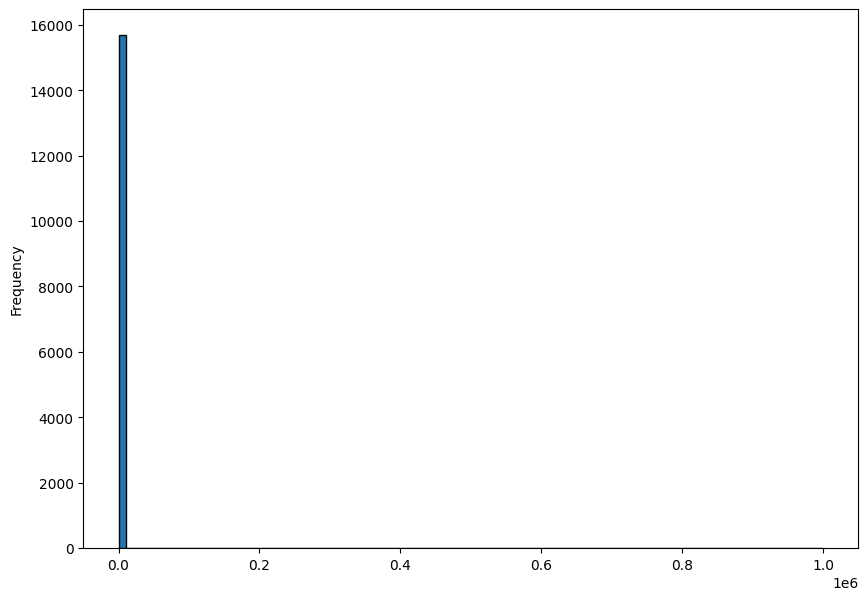

In [20]:
spotify.Stream.plot(kind='hist', bins=100, range=(0, 1000000), edgecolor='black', figsize=(10,7))

<Axes: >

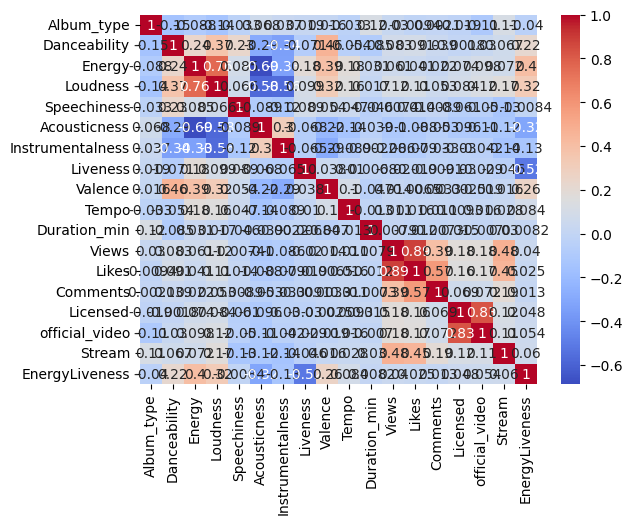

In [21]:
sns.heatmap(spotify.corr(numeric_only=True), annot=True, cmap='coolwarm', )

In [22]:
X = spotify.drop(['Stream', 'Artist','Track','Album', 'Title', 'Channel', 'most_playedon'], axis=1)
Y = spotify['Stream']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

r2_score(Y_test, Y_pred)
msle = mean_squared_error(Y_test, Y_pred)

print(f"R2 Score: {r2_score(Y_test, Y_pred)}")
print(f"Mean Squared Logarithmic Error: {msle}")



R2 Score: 0.29639634542681614
Mean Squared Logarithmic Error: 1.8682469531028765
